In [ ]:
import littlelearn as ll
from littlelearn.DeepLearning import activations as f
from littlelearn import Tensor as tensor
from littlelearn.DeepLearning import layers as ly
import matplotlib.pyplot as plt
import math

In [ ]:
def LMA_Kfactor (Q : tensor,K : tensor,V:tensor,Wv : tensor, Wo : tensor) :
  factor = ll.randn((1,1,Q.shape[-1])) *1e-4
  score = Q + (factor * K)
  v = ll.matmul(V,Wv)
  score = f.softmax(score,axis=-1,keepdims=True,use_crossentropy=False)
  attn = (score * v) + v
  attn = ll.matmul(attn,Wo)
  return attn

In [ ]:
Q = ll.rand(1,10,32)
K = ll.rand(1,10,32)
V = ll.rand(1,10,32)
Wv = ll.uniform(shape=(32,32))
Wo = ll.uniform(shape=(32,32))

In [ ]:
score = Q + (ll.randn((1,1,Q.shape[-1])) *1e-4 * K)
score[0][0]

Tensor(shape=(32,), dtype=<class 'jax.numpy.float32'>, device=cpu, requires_grad=False)
[0.79106677 0.78544414 0.01629276 0.25834718 0.08336928 0.7750362
 0.08086918 0.7562042  0.8788092  0.652715   0.14583728 0.935554
 0.8282616  0.60594773 0.6348244  0.8180981  0.0195711  0.46355107
 0.15716374 0.48525974 0.6065246  0.15939654 0.4433956  0.2768045
 0.8141779  0.31206623 0.83627063 0.5322376  0.20537937 0.6996423
 0.38044223 0.56634486]

In [ ]:
v = ll.matmul(V,Wv)
v[0][0]

Tensor(shape=(32,), dtype=<class 'jax.numpy.float32'>, device=cpu, requires_grad=False)
[ 3.9632728  -0.80255353  1.1085035   3.0312524  -0.52919513 -1.1872553
  2.4030507   1.993945    2.1390991   0.22233562 -0.46878326 -0.7545934
 -0.44166228  2.5170388  -0.6224081  -0.5413768   1.5152429  -0.0064271
  0.63296574 -3.4028912   2.8893366   0.1928476  -4.310254   -1.490234
 -0.08710677  1.930842   -0.92470884 -1.4688742   3.7338245   0.10812953
  2.3515203  -0.30866447]

In [ ]:
score = f.softmax(score,axis=-1,keepdims=True,use_crossentropy=False)
score[0][0]

Tensor(shape=(32,), dtype=<class 'jax.numpy.float32'>, device=cpu, requires_grad=False)
[0.04019235 0.039967   0.01852095 0.02359317 0.01980589 0.03955319
 0.01975643 0.03881529 0.04387827 0.0349992  0.02108259 0.04644014
 0.04171545 0.03340006 0.03437861 0.04129362 0.01858177 0.02896711
 0.02132273 0.02960283 0.03341934 0.0213704  0.02838911 0.02403268
 0.04113206 0.02489523 0.04205089 0.03102669 0.02237601 0.03668076
 0.02665702 0.03210317]

In [ ]:
attn = (score *v) + v
attn[0][0]

Tensor(shape=(32,), dtype=<class 'jax.numpy.float32'>, device=cpu, requires_grad=False)
[ 4.122566   -0.8346292   1.129034    3.1027691  -0.5396763  -1.234215
  2.4505265   2.0713406   2.232959    0.23011719 -0.47866642 -0.7896368
 -0.46008644  2.601108   -0.6438056  -0.56373227  1.5433989  -0.00661327
  0.6464623  -3.5036263   2.9858963   0.19696882 -4.432618   -1.5260483
 -0.09068965  1.9789108  -0.96359366 -1.5144485   3.8173726   0.1120958
  2.4142048  -0.3185736 ]

In [ ]:
def entropy (logits : tensor) :
  return -1 * ll.sum(logits * ll.log(logits),axis=-1,keepdims=True)

In [ ]:
e = entropy(score)
e

Tensor(shape=(1, 10, 1), dtype=<class 'jax.numpy.float32'>, device=cpu, requires_grad=False)
[[[3.4332945]
  [3.4292343]
  [3.4326649]
  [3.4168131]
  [3.4191422]
  [3.425558 ]
  [3.4302263]
  [3.428927 ]
  [3.4319873]
  [3.4298966]]]

In [ ]:
Wk  = ll.uniform(shape=(32,32))
Wq =  ll.uniform(shape=(32,32))

In [ ]:
Q = ll.matmul(Q,Wq)
K = ll.matmul(K,Wk)
V = ll.matmul(V,Wv)

score = ll.matmul(Q,K,transpose_b=True) / math.sqrt(Q.shape[-1])
score = f.softmax(score,axis=-1,keepdims=True,use_crossentropy=False)


In [ ]:
attn2 = ll.matmul(score,V)
attn2[0][0]

Tensor(shape=(32,), dtype=<class 'jax.numpy.float32'>, device=cpu, requires_grad=False)
[ 4.242894   -1.6690397   0.44097957  4.2382107   0.24006177 -1.3982049
  1.9986523   2.5309634   1.8396821   0.11798917 -0.0099257   0.29921418
 -0.46953374 -0.02411496 -0.40349367  0.06211646  0.9627196   0.10360295
 -0.5147828  -3.1839674   3.0365431   0.9487485  -4.967029   -0.57217234
  0.6897658   1.7701112  -1.7368851  -1.7610658   3.9077125  -0.8207087
  2.9798188  -0.6038444 ]

In [ ]:
class Attention (ly.Component) :
  def __init__ (self,embed_dim) :
    std = math.sqrt(6/(embed_dim*2))
    super().__init__()
    self.wk = ly.Parameter(
        tensor=ll.uniform(low=-std,high=std,shape=(embed_dim,embed_dim))
    )
    self.wq = ly.Parameter(
        tensor=ll.uniform(low=-std,high=std,shape=(embed_dim,embed_dim))
    )
    self.wv = ly.Parameter(
        tensor=ll.uniform(low=-std,high=std,shape=(embed_dim,embed_dim))
    )
    self.entropy_record = []


  def forwardpass(self,Q,K,V) :
    k = ll.matmul(K,self.wk)
    q = ll.matmul(Q,self.wq)
    v = ll.matmul(V,self.wv)
    score = ll.matmul(q,k,transpose_b=True) / K.shape[-1]
    score = f.softmax(score,axis=1,keepdims=True,use_crossentropy=False)
    self.entropy_record.append(
        entropy(ll.to_tensor(score.tensor,requires_grad=False)).mean()
    )
    attn = ll.matmul(score,v)
    return attn

class LMA (ly.Component) :
  def __init__(self,embed_dim) :
    super().__init__()
    std = math.sqrt(6 / (embed_dim * 2))
    self.wv = ly.Parameter(
        tensor=ll.uniform(low=-std, high=std, shape=(embed_dim, embed_dim))
    )
    self.wo = ly.Parameter(
        tensor= ll.uniform(low=-std,high=std,shape=(embed_dim,embed_dim))
    )
    self.factor = ly.Parameter(
        tensor=ll.uniform(low=-std,high=std,shape=(1,1,embed_dim)) * 1-4
    )
    self.entropy_record = []

  def forwardpass(self,Q,K,V) :
    score = Q + (self.factor * K)
    v = ll.matmul(V,self.wv)
    score = f.softmax(score,axis=-1,keepdims=True,use_crossentropy=False)
    self.entropy_record.append(
        entropy(ll.to_tensor(score.tensor,requires_grad=False)).mean())
    attn = (score * v) + v
    attn = ll.matmul(attn,self.wo)
    return attn

In [ ]:
import kagglehub
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("eshummalik/socialbuzz-sentiment-analytics")

print("Path to dataset files:", path)

100%|██████████| 50.9k/50.9k [00:00<00:00, 13.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/eshummalik/socialbuzz-sentiment-analytics/versions/4


In [ ]:
df = pd.read_csv(path+'/sentimentdataset.csv')
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [ ]:
tokenizer = ll.preprocessing.Tokenizer()
tokenizer.fit_on_texts(df['Text'].to_list())
enc_label = ll.preprocessing.LabelEncoder()
enc_label.fit(df['Sentiment'].to_list())
tokenizer.len_vocab


2555

In [ ]:
x_train = tokenizer.texts_to_sequences(df['Text'].to_list())
y_train = enc_label.encod(df['Sentiment'].to_list())
x_train = ll.preprocessing.pad_sequence(x_train)

In [ ]:
class AttnModel (ly.Component) :
  def __init__(self,embed_dim,num_class):
    super().__init__()
    self.embedding = ly.Embedding(tokenizer.len_vocab + 1,embedding_dim=embed_dim)
    self.learn_embed = ly.Embedding(100,embedding_dim=embed_dim)
    self.attention = Attention(embed_dim)
    self.scale = embed_dim **0.5
    self.ffn = ly.Sequential(
        [
            ly.Linear(embed_dim,embed_dim*4),
            f.Gelu(),
            ly.Linear(embed_dim*4,embed_dim)
        ]
    )
    self.fo = ly.Linear(embed_dim,num_class)
    self.drop_out = ly.Dropout(0.1)
    self.norm1 = ly.RMSNorm(embed_dim)
    self.norm2 = ly.RMSNorm(embed_dim)
    self.drop_out2 = ly.Dropout(0.1)

  def forwardpass (self,x) :
    B,S = x.shape
    x = self.embedding(x)
    x = x * self.scale
    pos = ll.arange(0,S,device=x.device)
    pos = self.learn_embed(pos)
    pos = ll.expand_dims(pos)
    x = x + pos
    z = self.norm1(x)
    attn = self.attention(z,z,z)
    x = x + self.drop_out(attn)

    z = self.norm2(x)
    ffn = self.ffn(z)
    x = x + self.drop_out2(ffn)
    x = ll.mean(x,axis=1)
    return self.fo(x)


class LMAModel (ly.Component) :
  def __init__ (self,embed_dim,num_class) :
    super().__init__()
    self.embedding = ly.Embedding(tokenizer.len_vocab + 1,embedding_dim=embed_dim)
    self.learn_embed = ly.Embedding(100,embedding_dim=embed_dim)
    self.lma = LMA(embed_dim)
    self.scale = embed_dim ** 0.5
    self.fo = ly.Linear(embed_dim,num_class)
    self.drop_out = ly.Dropout(0.1)
    self.drop_out2 = ly.Dropout(0.1)
    self.norm1 = ly.RMSNorm(embed_dim)
    self.norm2 = ly.RMSNorm(embed_dim)
    self.ffn = ly.Sequential([
        ly.Linear(embed_dim,embed_dim*4),
        f.Gelu(),
        ly.Linear(embed_dim*4,embed_dim)
    ])

  def forwardpass(self,x) :
    b,s = x.shape
    x = self.embedding(x)
    x = x * self.scale
    pos = ll.arange(0,s,device=x.device)
    pos = self.learn_embed(pos)
    pos = ll.expand_dims(pos)

    x = x + pos

    z = self.norm1(x)
    attn = self.lma(z,z,z)
    x = x + self.drop_out(attn)

    z = self.norm2(x)
    ffn = self.ffn(z)
    x = x + self.drop_out2(ffn)

    x = ll.mean(x,axis=1)
    x = self.fo(x)
    return x

In [ ]:
modelLMA = LMAModel(64,num_class=279)
modelattn = AttnModel(64,num_class=279)

In [ ]:
epochs = 50
loss_hits = []

In [ ]:
modelLMA.train(True)
modelattn.train(True)
optim1 = ll.DeepLearning.optimizers.Adam(modelLMA.parameter())
optim2 = ll.DeepLearning.optimizers.Adam(modelattn.parameter())

name : LMAModel status : active || requires_grad : True
name : AttnModel status : active || requires_grad : True


In [ ]:
for epoch in range(epochs) :
  y_pred = modelLMA(x_train)
  loss = ll.DeepLearning.loss.sparse_crossentropy(y_train,y_pred)
  loss.backwardpass()
  optim1.step()
  loss.reset_grad()
  loss_hits.append(loss.tensor)
  print(f"Epoch {epoch + 1} / {epochs} Loss {loss.tensor}")


Epoch 1 / 50 Loss 9.18786907196045
Epoch 2 / 50 Loss 8.712950706481934
Epoch 3 / 50 Loss 8.265131950378418
Epoch 4 / 50 Loss 7.788559913635254
Epoch 5 / 50 Loss 7.330915927886963
Epoch 6 / 50 Loss 6.910390853881836
Epoch 7 / 50 Loss 6.553415298461914
Epoch 8 / 50 Loss 6.264624118804932
Epoch 9 / 50 Loss 6.041214942932129
Epoch 10 / 50 Loss 5.860955238342285
Epoch 11 / 50 Loss 5.720735549926758
Epoch 12 / 50 Loss 5.609768867492676
Epoch 13 / 50 Loss 5.522182941436768
Epoch 14 / 50 Loss 5.445695877075195
Epoch 15 / 50 Loss 5.375753402709961
Epoch 16 / 50 Loss 5.313902854919434
Epoch 17 / 50 Loss 5.257791519165039
Epoch 18 / 50 Loss 5.211334705352783
Epoch 19 / 50 Loss 5.16487979888916
Epoch 20 / 50 Loss 5.118109703063965
Epoch 21 / 50 Loss 5.07056188583374
Epoch 22 / 50 Loss 5.023227214813232
Epoch 23 / 50 Loss 4.986806392669678
Epoch 24 / 50 Loss 4.959281921386719
Epoch 25 / 50 Loss 4.942150115966797
Epoch 26 / 50 Loss 4.93609619140625
Epoch 27 / 50 Loss 4.929743766784668
Epoch 28 / 50 

In [ ]:
loss_hist2 = []

In [ ]:
for epoch in range(epochs) :
  y_pred = modelattn(x_train)
  loss = ll.DeepLearning.loss.sparse_crossentropy(y_train,y_pred)
  loss.backwardpass()
  optim2.step()
  loss.reset_grad()
  loss_hist2.append(loss.tensor)
  print(f"Epoch {epoch + 1} / {epochs} Loss {loss.tensor}")


Epoch 1 / 50 Loss 8.255178451538086
Epoch 2 / 50 Loss 7.804440021514893
Epoch 3 / 50 Loss 7.396392345428467
Epoch 4 / 50 Loss 6.964498043060303
Epoch 5 / 50 Loss 6.557426929473877
Epoch 6 / 50 Loss 6.210108757019043
Epoch 7 / 50 Loss 5.935339450836182
Epoch 8 / 50 Loss 5.7346601486206055
Epoch 9 / 50 Loss 5.593846797943115
Epoch 10 / 50 Loss 5.486883640289307
Epoch 11 / 50 Loss 5.408687114715576
Epoch 12 / 50 Loss 5.347652912139893
Epoch 13 / 50 Loss 5.301356315612793
Epoch 14 / 50 Loss 5.247891902923584
Epoch 15 / 50 Loss 5.196457862854004
Epoch 16 / 50 Loss 5.1514458656311035
Epoch 17 / 50 Loss 5.116147994995117
Epoch 18 / 50 Loss 5.0891523361206055
Epoch 19 / 50 Loss 5.0634684562683105
Epoch 20 / 50 Loss 5.045342445373535
Epoch 21 / 50 Loss 5.023393154144287
Epoch 22 / 50 Loss 5.001269817352295
Epoch 23 / 50 Loss 4.976233959197998
Epoch 24 / 50 Loss 4.954732418060303
Epoch 25 / 50 Loss 4.931528568267822
Epoch 26 / 50 Loss 4.90330171585083
Epoch 27 / 50 Loss 4.880505084991455
Epoch 2

In [ ]:
lma_entropy = [e.tensor for e in modelLMA.lma.entropy_record]
attn_entropy = [e.tensor for e in modelattn.attention.entropy_record]

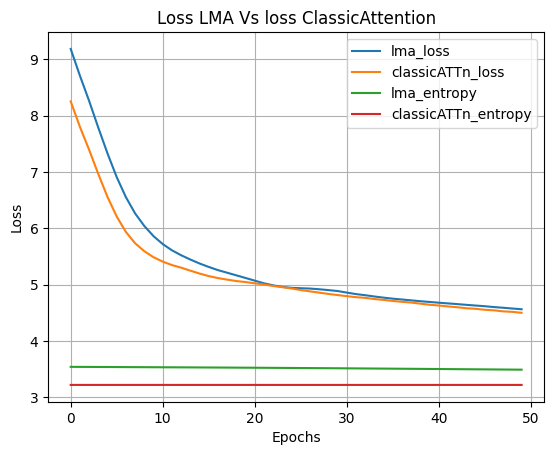

In [ ]:
plt.title("Loss LMA Vs loss ClassicAttention")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_hits,label='lma_loss')
plt.plot(loss_hist2,label='classicATTn_loss')
plt.plot(lma_entropy,label='lma_entropy')
plt.plot(attn_entropy,label='classicATTn_entropy')
plt.legend()
plt.grid(True)
plt.show()

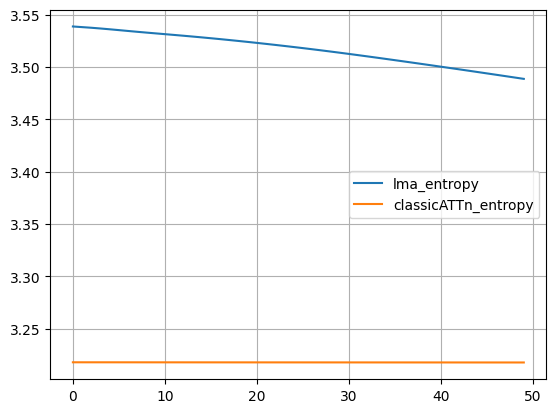

In [ ]:
plt.plot(lma_entropy,label='lma_entropy')
plt.plot(attn_entropy,label='classicATTn_entropy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
modelLMA.inference(True)


name : LMAModel status : non active || requires_grad : False


In [ ]:
y = modelLMA(x_train)
y = f.softmax(y)